#Importing Dataset

#Import libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

## Training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_veg/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_veg/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


##Building model

In [5]:


# Step 3: Define a Sequential model (correcting the typo)

cnn = tf.keras.models.Sequential()


## Building convolution layers

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25)) #to avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

## Compiling and trining face

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 758s 8s/step - accuracy: 0.0271 - loss: 30.4439 - val_accuracy: 0.0598 - val_loss: 3.3925
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 672ms/step - accuracy: 0.0704 - loss: 3.4070 - val_accuracy: 0.1567 - val_loss: 3.1102
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 653ms/step - accuracy: 0.1091 - loss: 3.2124 - val_accuracy: 0.3305 - val_loss: 2.8475
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 624ms/step - accuracy: 0.1547 - loss: 2.9478 - val_accuracy: 0.4872 - val_loss: 2.0353
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 655ms/step - accuracy: 0.2463 - loss: 2.6466 - val_accuracy: 0.6296 - val_loss: 1.7677
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 655ms/step - accuracy: 0.3202 - loss: 2.3437 - val_accuracy: 0.7607 - val_loss: 1.1861
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 649ms/step - accuracy: 0.3954 - loss: 2.0917 - val_accuracy: 0.8462 - val_loss: 0.9361
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 646ms/step - accuracy: 0.4850 - loss: 1.7216 - val_accu

##Evaluavting the model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 562ms/step - accuracy: 0.9915 - loss: 0.0506
Training accuracy: 0.9906902313232422


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 593ms/step - accuracy: 0.9674 - loss: 0.2169
Validation accuracy: 0.9572649598121643


##Model saving

In [20]:
cnn.save('trained_model.h5')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03723916411399841,
  0.07415730506181717,
  0.11396468430757523,
  0.1736757606267929,
  0.2539325952529907,
  0.33643659949302673,
  0.41605135798454285,
  0.5110754370689392,
  0.5903691649436951,
  0.6545746326446533,
  0.7200642228126526,
  0.7537720799446106,
  0.7788121700286865,
  0.8202247023582458,
  0.8362760543823242,
  0.8629213571548462,
  0.8751204013824463,
  0.8902086615562439,
  0.9033707976341248,
  0.8995184302330017,
  0.9191011190414429,
  0.9139646887779236,
  0.9303370714187622,
  0.936115562915802,
  0.9306581020355225,
  0.9499197602272034,
  0.9434992074966431,
  0.9512038230895996,
  0.940930962562561,
  0.9406099319458008],
 'loss': [10.295705795288086,
  3.3691458702087402,
  3.1621832847595215,
  2.8724989891052246,
  2.5667052268981934,
  2.261997699737549,
  1.9864872694015503,
  1.6380722522735596,
  1.4034388065338135,
  1.133267879486084,
  0.9459905028343201,
  0.8549721837043762,
  0.7366187572479248,
  0.6162663102149963,
  0.524543

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.72649598121643 %


#Accuracy Visualization

##Training Visualization

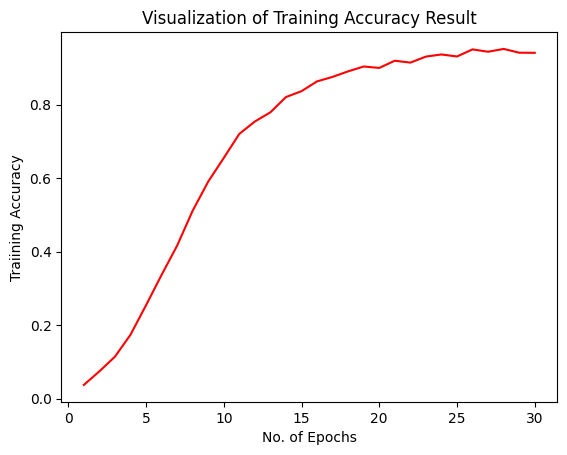

In [25]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

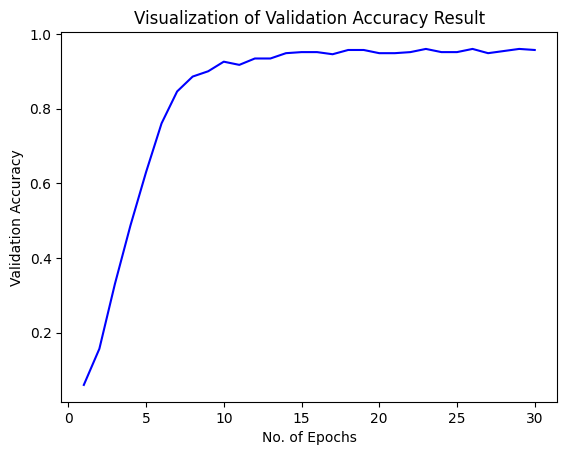

In [26]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set evaluation

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_veg/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.
